Phys474 - Spring 2023

Lab 3 - The Time Dependent Schrodinger Equation 

<font color='red'>Author: RJ Young

In this lab you will gain practice in calculating the TDSE for various potentials. In particular we will examine the scattering of a guassian wave packet from 
- Step Potential
- Barrier Potential

The Schrodinger equation is given by

$i\hbar\frac{\partial\Psi(x)}{\partial x} = \hat{H}\Psi(x)$ 

or,

$i\hbar\frac{\partial\Psi(x)}{\partial x} = -\frac{\hbar^2}{2m}\nabla^2\Psi(x)+V(x)\Psi(x)$ 

We implement this in 1D using the Hamiltonian as we did for the TISE

the QM Hamiltonian is given by

$\hat{H}=T+V=-\frac{\hbar^2}{2m}\nabla^2+V$

The Laplacian $\nabla^2$ in 1D is given by an $nxn$ matrix

$\nabla^2= \frac{\partial^2}{\partial x^2}=
\frac{1}{a^2}\begin{pmatrix}
-2& 1 & 0& 0&0&\ldots \\
1 &-2 & 1 &0 &0 &\ldots\\
0 & 1 & -2& 1 & 0 & \ldots \\
0 & 0 &1&-2&1&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix}$

where we put the problem on a grid of $n$ points in $x$ with spacing $a$.


Then for the Hamiltonian we have

$\hat{H}=T+V=-\frac{\hbar^2}{2m}\nabla^2+V = \frac{-\hbar^2}{2ma^2}\begin{pmatrix}
-2& 1 & 0& 0&0&\ldots \\
1 &-2 & 1 &0 &0 &\ldots\\
0 & 1 & -2& 1 & 0 & \ldots \\
0 & 0 &1&-2&1&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix}  + 
\begin{pmatrix}
V(x_1)& 0 & 0& 0&0&\ldots \\
0 &V(x_2) & 0 &0 &0 &\ldots\\
0 & 0 & V(x_3)& 0 & 0 & \ldots \\
0 & 0 &0&V(x_4)&0&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix} 
$

<br><br>
    
We will be examining the "motion" of an initial wavefunction $\psi(x,0)$ given as a gaussian wave packet, which are very often used
as a way to represent a "particle" of mean wavenumber (i.e. momentum) $k_0$. 

A Gaussian wave packet properly normalized such that 

$\int_{-\infty}^{\infty} \left|\psi(x,0)\right|^2  dx =1 $

is then given by

$\psi(x,0) = \frac{1}{\sqrt{\sigma_x\sqrt{2\pi}}}e^{-\frac{(x-x_0)^2}{4\sigma_x^2}}e^{ik_0x}$

where $x_0$ is the central position and $\sigma_x$ is the "spatial width" of $\left|\psi(x,0)\right|^2$ and $k_0$ is the mean wave number (i.e moving to the right with mean $k_0$).


___________________________________________________________________________________
Use the following unless instructed otherwise

- Use atomic units $\hbar =1$, use $m=m_e=1$
- use an array for $x$ with spacing $.01$ and $0\le x \le 50.$
- use an array for times with spacing $0.005$ and $0\le t \le 4$
- for the wave packet use $x_0=12.5$ and $\sigma_x=1$ unless directed otherwise
- Make your plots and animations like the example from lecture on Lab 2 with $V(x)$, $\left<E\right>$ with band of $\pm 2\sigma_E$, $|\Psi(x)|^2$

+++++++++++++++++++++++++++++++++++++++++++<br>
For the Step Potential use

$V(x)=0$ for $0\le x\le 25$ <br>
$V(x)=40$ for $25\lt x\le 50 $<br>
+++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++<br>
For the Barrier Potential use 


$V(x)=V_0$ for $25\lt x\le 25+W$ <br>
$V(x)=0$ otherwise <br>

where $W$ is the width in a.u. and $V_0$ is the barrier potential, which can also be negative. Both will be 
specified below for various cases<br>
+++++++++++++++++++++++++++++++++++++++++++



________________________________________________________________________________
Part 1 (5 points)


- make a single plot with 2 subplots top: the $Re(\Psi(x))$, $Im(\Psi(x))$ and $|\Psi(x)|$ for $k_0=5$ and $\sigma_x=1.0$, bottom:  the Fourier Transform from $x$ space to $k$ space $|f(k)|=|FFT(\Psi(x))|$
- make a single plot with 2 subplots top: the $Re(\Psi(x))$, $Im(\Psi(x))$ and $|\Psi(x)|$ for $k_0=5$ and $\sigma_x=.5$, bottom:  the Fourier Transform from $x$ space to $k$ space $|f(k)|=|FFT(\Psi(x))|$
- make a single plot with 2 subplots top: the $Re(\Psi(x))$, $Im(\Psi(x))$ and $|\Psi(x)|$ for $k_0=9$ and $\sigma_x=1.0$, bottom:  the Fourier Transform from $x$ space to $k$ space $|f(k)|=|FFT(\Psi(x))|$

Note: when you do the fft on $\Psi(x)$ you are transforming to $1/x$ space to represent the result as $f(k)$ vs $k$ you have to multiply the $1/x$=axis number by $2\pi$ to get it in $k$ space
___________________________________________________________________________________

<IPython.core.display.Javascript object>


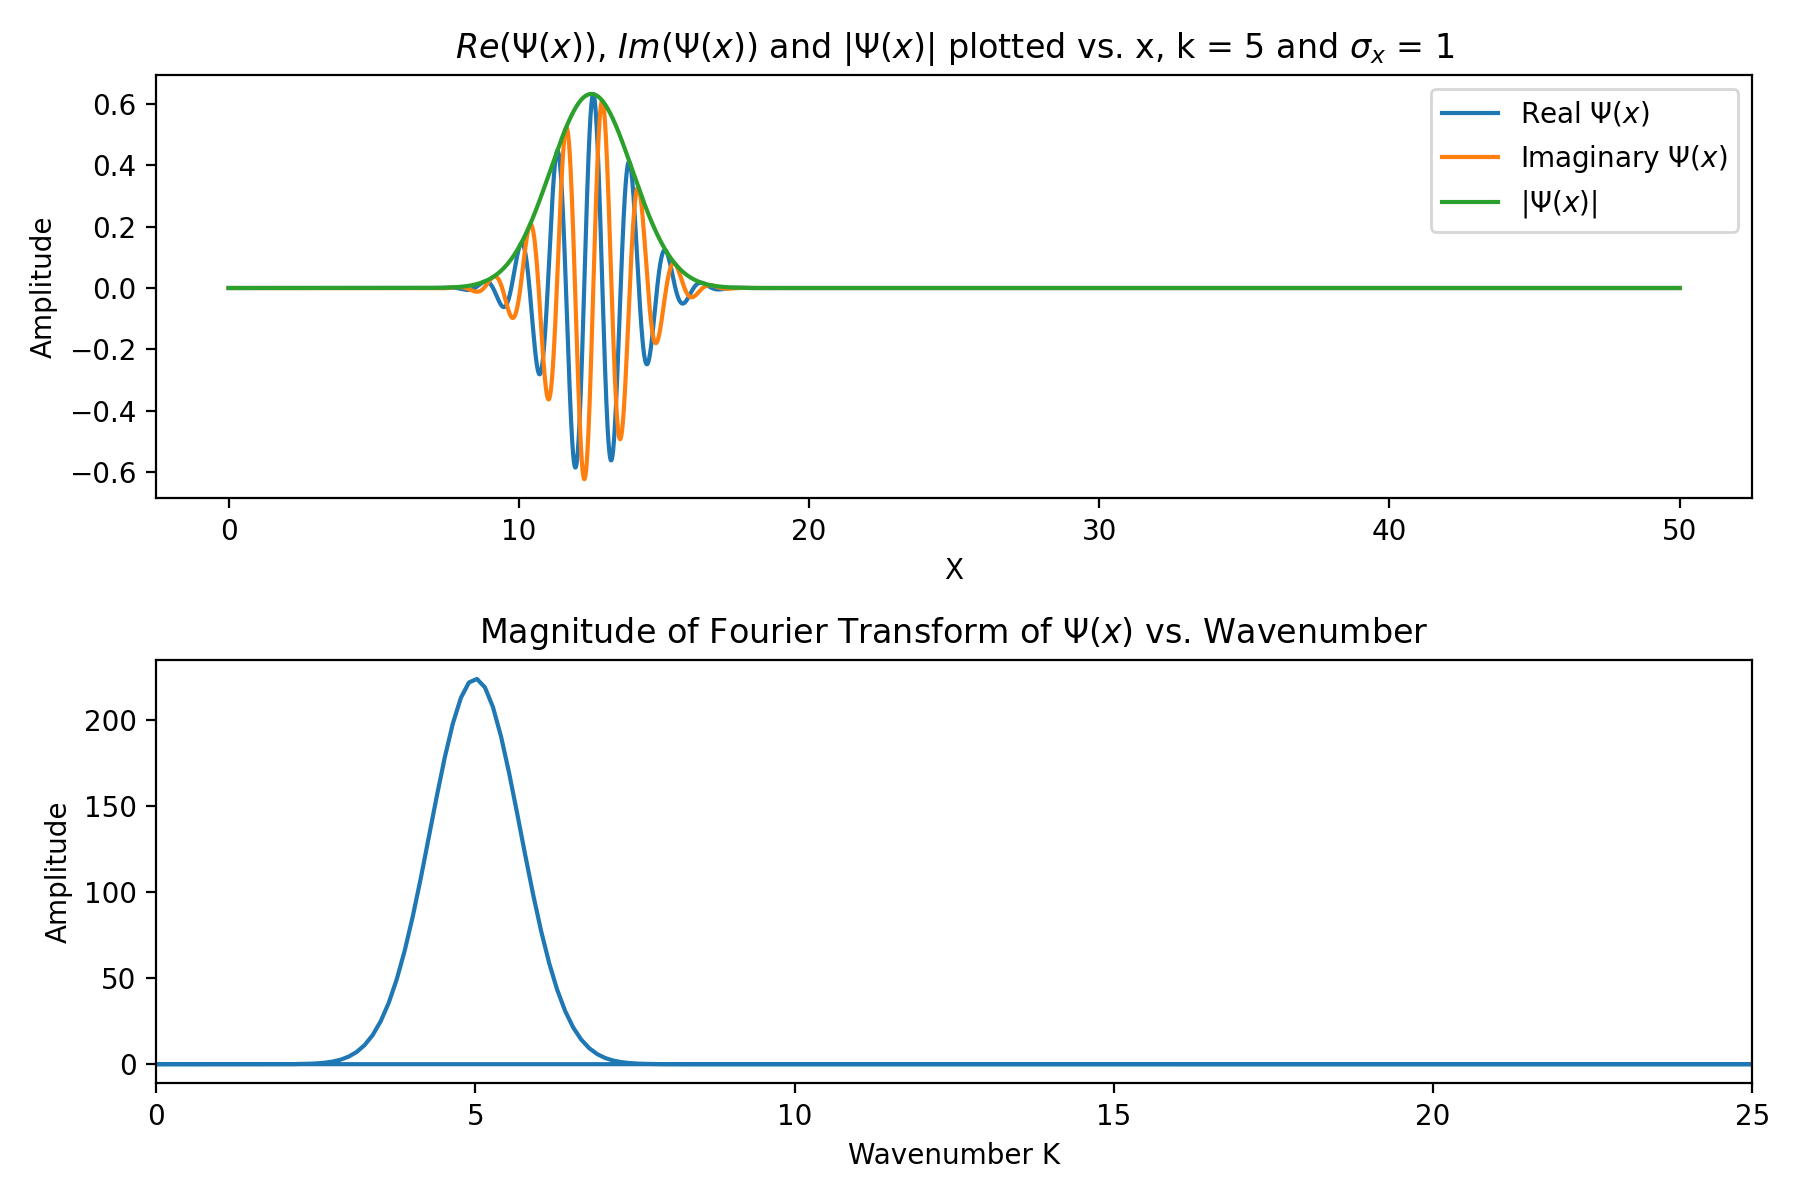

<IPython.core.display.Javascript object>


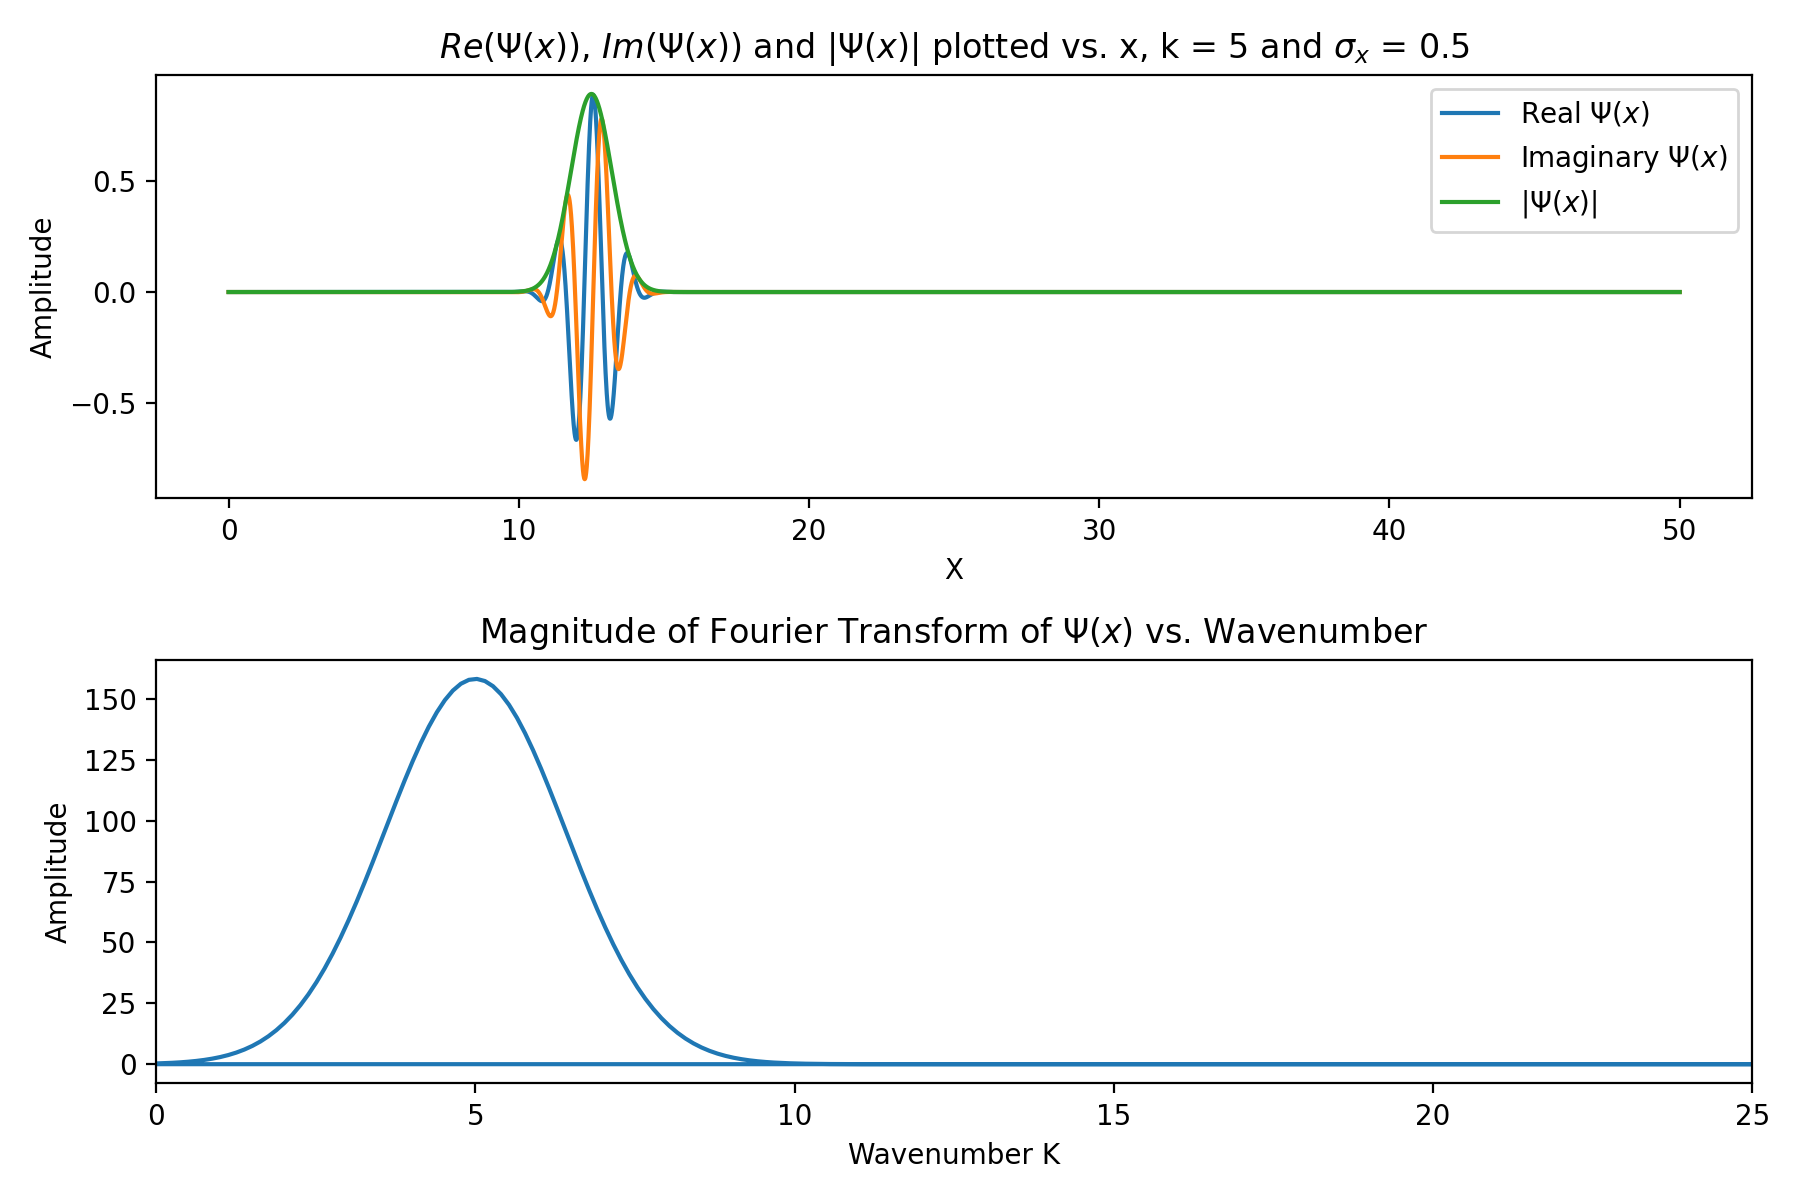

<IPython.core.display.Javascript object>


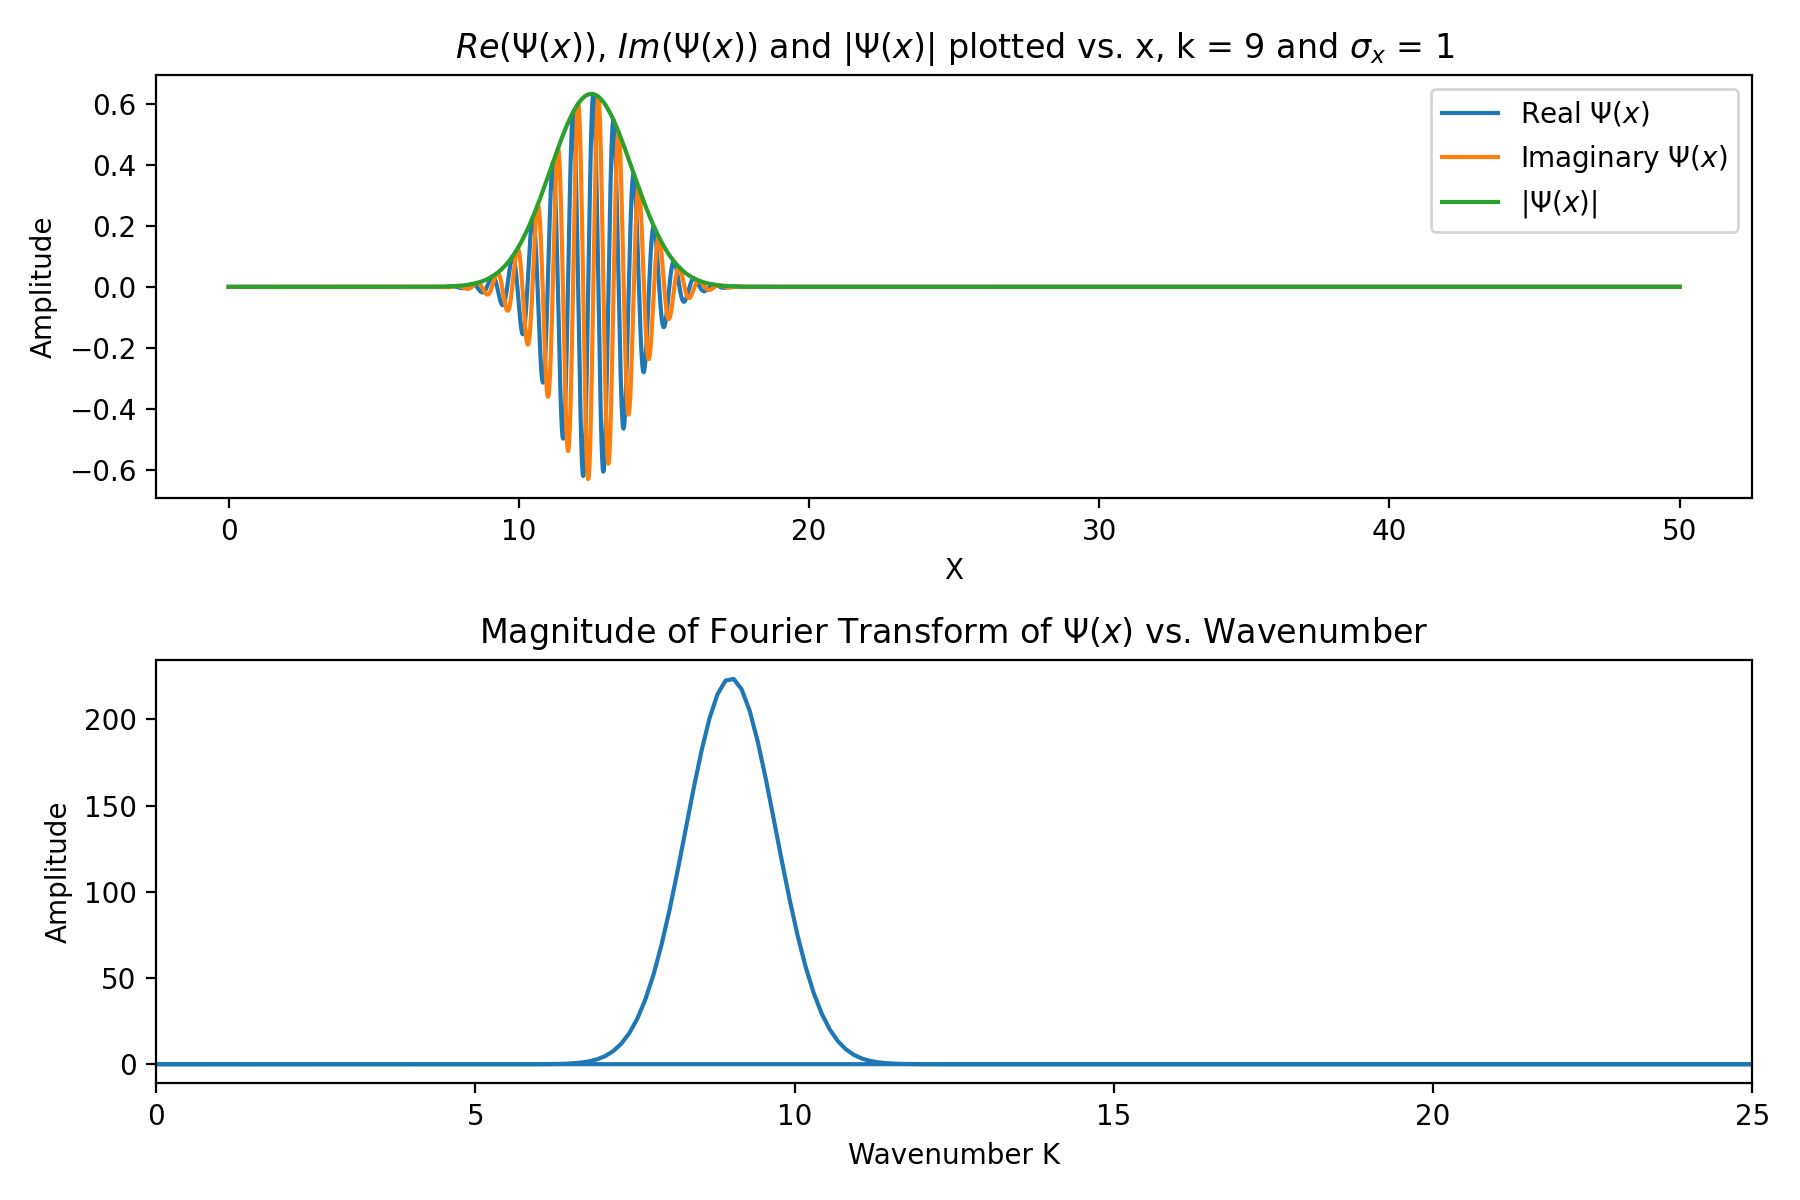

In [1]:

"""
You may find it useful to write code here then execute different cases in 
additional code cells...
"""

#setting up the problem and making user functions
import matplotlib.pyplot as plt
from matplotlib import animation

import numpy as np

from scipy.integrate import solve_ivp
from scipy import sparse
%matplotlib notebook 

hbar = 1
m = 1
m_e = 1

x_min = 0
x_max = 50
dx = 0.01
x = np.arange(x_min,x_max+dx,dx)

x0 = 12.5

def step_potential(x, Vstep):
    V = np.copy(x)
    for i, s in enumerate(x):
        if x[i] <= 25:
            V[i] = 0
        else:
            V[i] = Vstep
    
    return V
            
def barrier_potential(x, V0, W):
    V = np.copy(x)
    for i,s in enumerate(x):
        if x[i] <= 25 or x[i] >= 25 + W:
            V[i] = 0
        else:
            V[i] = V0

    return V

def wavepacket(x, sigmax, x0, k0):
    psi = (1/np.sqrt(sigmax*np.sqrt(2*np.pi)))*np.exp(-(x-x0)**2/(4*sigmax**2))*np.exp(1j*k0*x)
    
    return psi

psi1 = wavepacket(x,1,x0,5)
psi2 = wavepacket(x,0.5,x0,5)
psi3 = wavepacket(x,1,x0,9)

# Figure 1
plt.figure(figsize=(9,6))

plt.subplot(2,1,1)
plt.plot(x,psi1.real, label = 'Real $\Psi(x)$')
plt.plot(x,psi1.imag, label = 'Imaginary $\Psi(x)$')
plt.plot(x,np.abs(psi1), label = '$|\Psi(x)|$')
plt.xlabel('X')
plt.ylabel('Amplitude')
plt.title('$Re(\Psi(x))$, $Im(\Psi(x))$ and $|\Psi(x)|$ plotted vs. x, k = 5 and $\sigma_{x}$ = 1')
plt.legend()

plt.subplot(2,1,2)
plt.plot(2*np.pi*np.fft.fftfreq(x.size,dx),np.abs(np.fft.fft(psi1)))
plt.xlabel('Wavenumber K')
plt.ylabel('Amplitude')
plt.title('Magnitude of Fourier Transform of $\Psi(x)$ vs. Wavenumber')
plt.xlim(0,25)

plt.tight_layout()
plt.show()

# Figure 2
plt.figure(figsize=(9,6))
plt.subplot(2,1,1)
plt.plot(x,psi2.real, label = 'Real $\Psi(x)$')
plt.plot(x,psi2.imag, label = 'Imaginary $\Psi(x)$')
plt.plot(x,np.abs(psi2), label = '$|\Psi(x)|$')
plt.xlabel('X')
plt.ylabel('Amplitude')
plt.title('$Re(\Psi(x))$, $Im(\Psi(x))$ and $|\Psi(x)|$ plotted vs. x, k = 5 and $\sigma_{x}$ = 0.5')
plt.legend()

plt.subplot(2,1,2)
plt.plot(2*np.pi*np.fft.fftfreq(x.size,dx),np.abs(np.fft.fft(psi2)))
plt.xlabel('Wavenumber K')
plt.ylabel('Amplitude')
plt.title('Magnitude of Fourier Transform of $\Psi(x)$ vs. Wavenumber')
plt.xlim(0,25)

plt.tight_layout()
plt.show()

# Figure 3
plt.figure(figsize=(9,6))
plt.subplot(2,1,1)
plt.plot(x,psi3.real, label = 'Real $\Psi(x)$')
plt.plot(x,psi3.imag, label = 'Imaginary $\Psi(x)$')
plt.plot(x,np.abs(psi3), label = '$|\Psi(x)|$')
plt.xlabel('X')
plt.ylabel('Amplitude')
plt.title('$Re(\Psi(x))$, $Im(\Psi(x))$ and $|\Psi(x)|$ plotted vs. x, k = 9 and $\sigma_{x}$ = 1')
plt.legend()

plt.subplot(2,1,2)
plt.plot(2*np.pi*np.fft.fftfreq(x.size,dx),np.abs(np.fft.fft(psi3)))
plt.xlabel('Wavenumber K')
plt.ylabel('Amplitude')
plt.title('Magnitude of Fourier Transform of $\Psi(x)$ vs. Wavenumber')
plt.xlim(0,25)

plt.tight_layout()
plt.show()

_____________________________________________________________________________________
Part 2: (7 points)

In this part we will make a plot with for each of the various initial conditions

- Each case should be a figure with 3 subplots (1 for each $k_0$)
- on each subplot plot the potential, the mean energy $E_{mean}$ with a band showing the $\pm 2\sigma_E$
- The initial wavefunction squared $|\psi(x,0)|^2$ on the line for $E_{mean}$

a) Step Potential, $V_0=40$
- $k_0=7$
- $k_0=9$
- $k_0=10$

b) Barrier Potential $W=.25$, $V_0=40$
- $k_0=7$
- $k_0=9$
- $k_0=10$

c) Barrier Potential $W=1$, $V_0=40$
- $k_0=7$
- $k_0=9$
- $k_0=10$

d) Barrier Potential $W=.25$, $V_0=-20$
- $k_0=7$
- $k_0=9$
- $k_0=10$


____________________________________________________________________________________

<IPython.core.display.Javascript object>


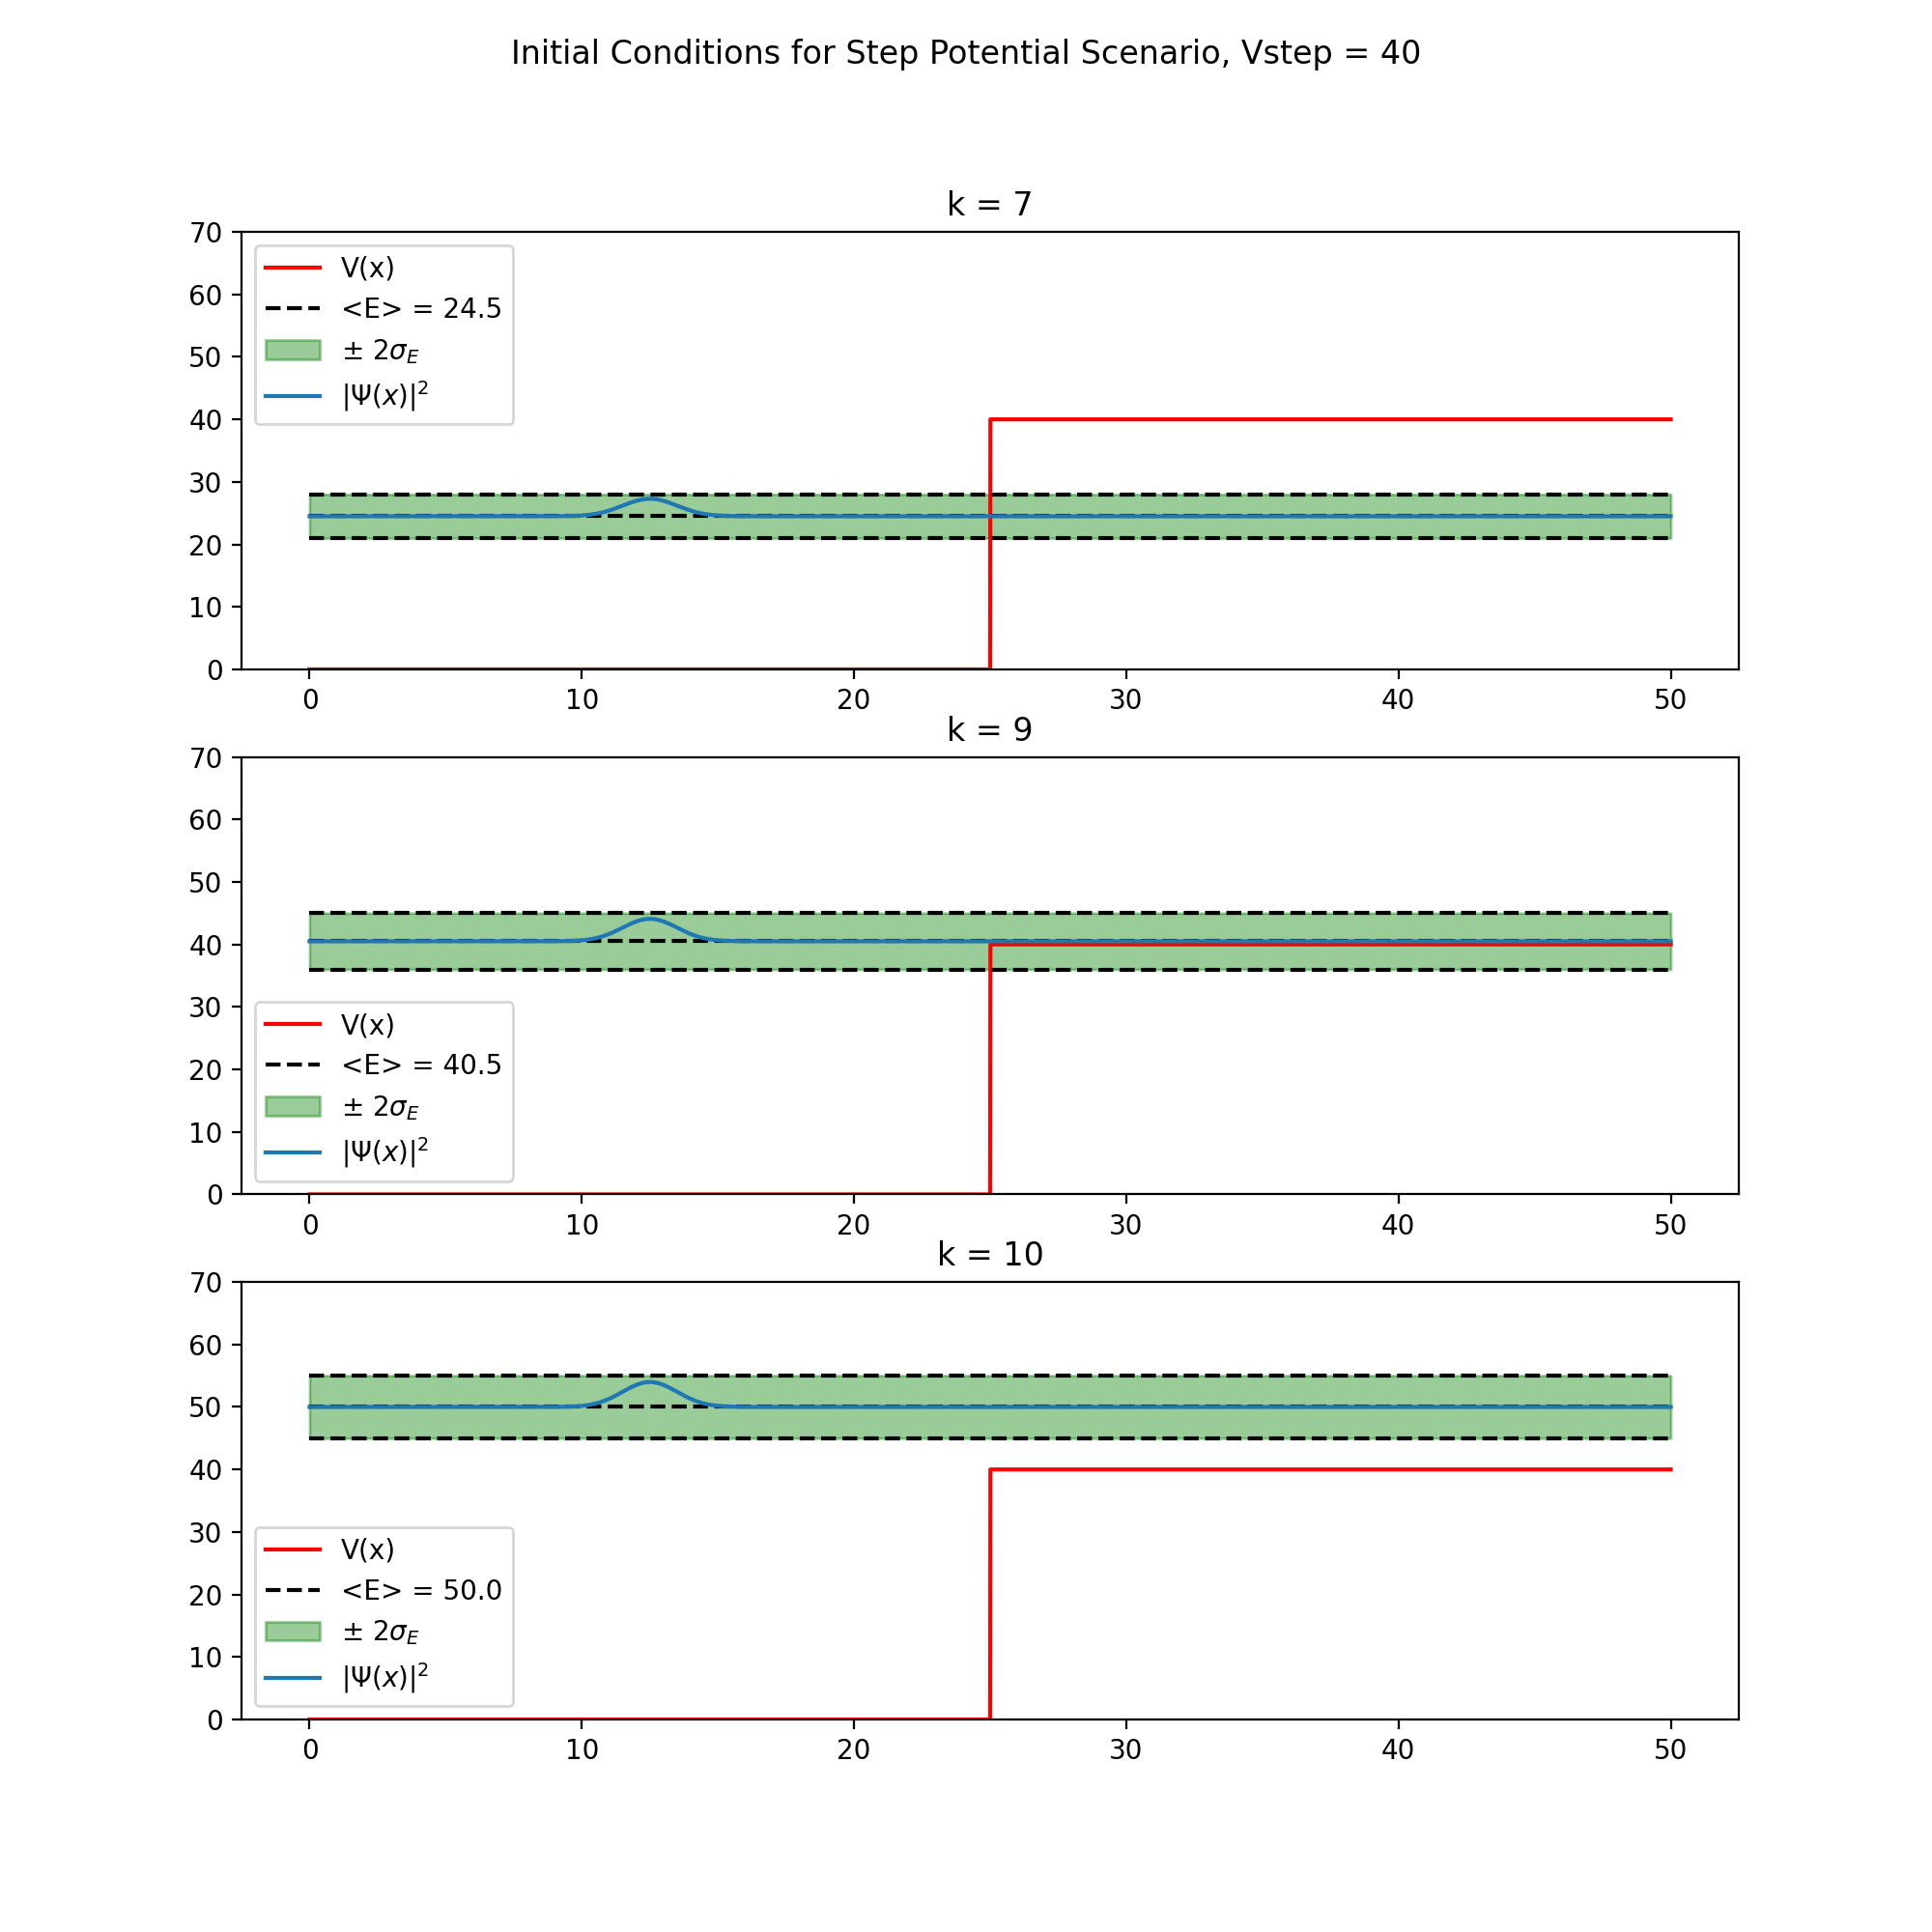

<IPython.core.display.Javascript object>


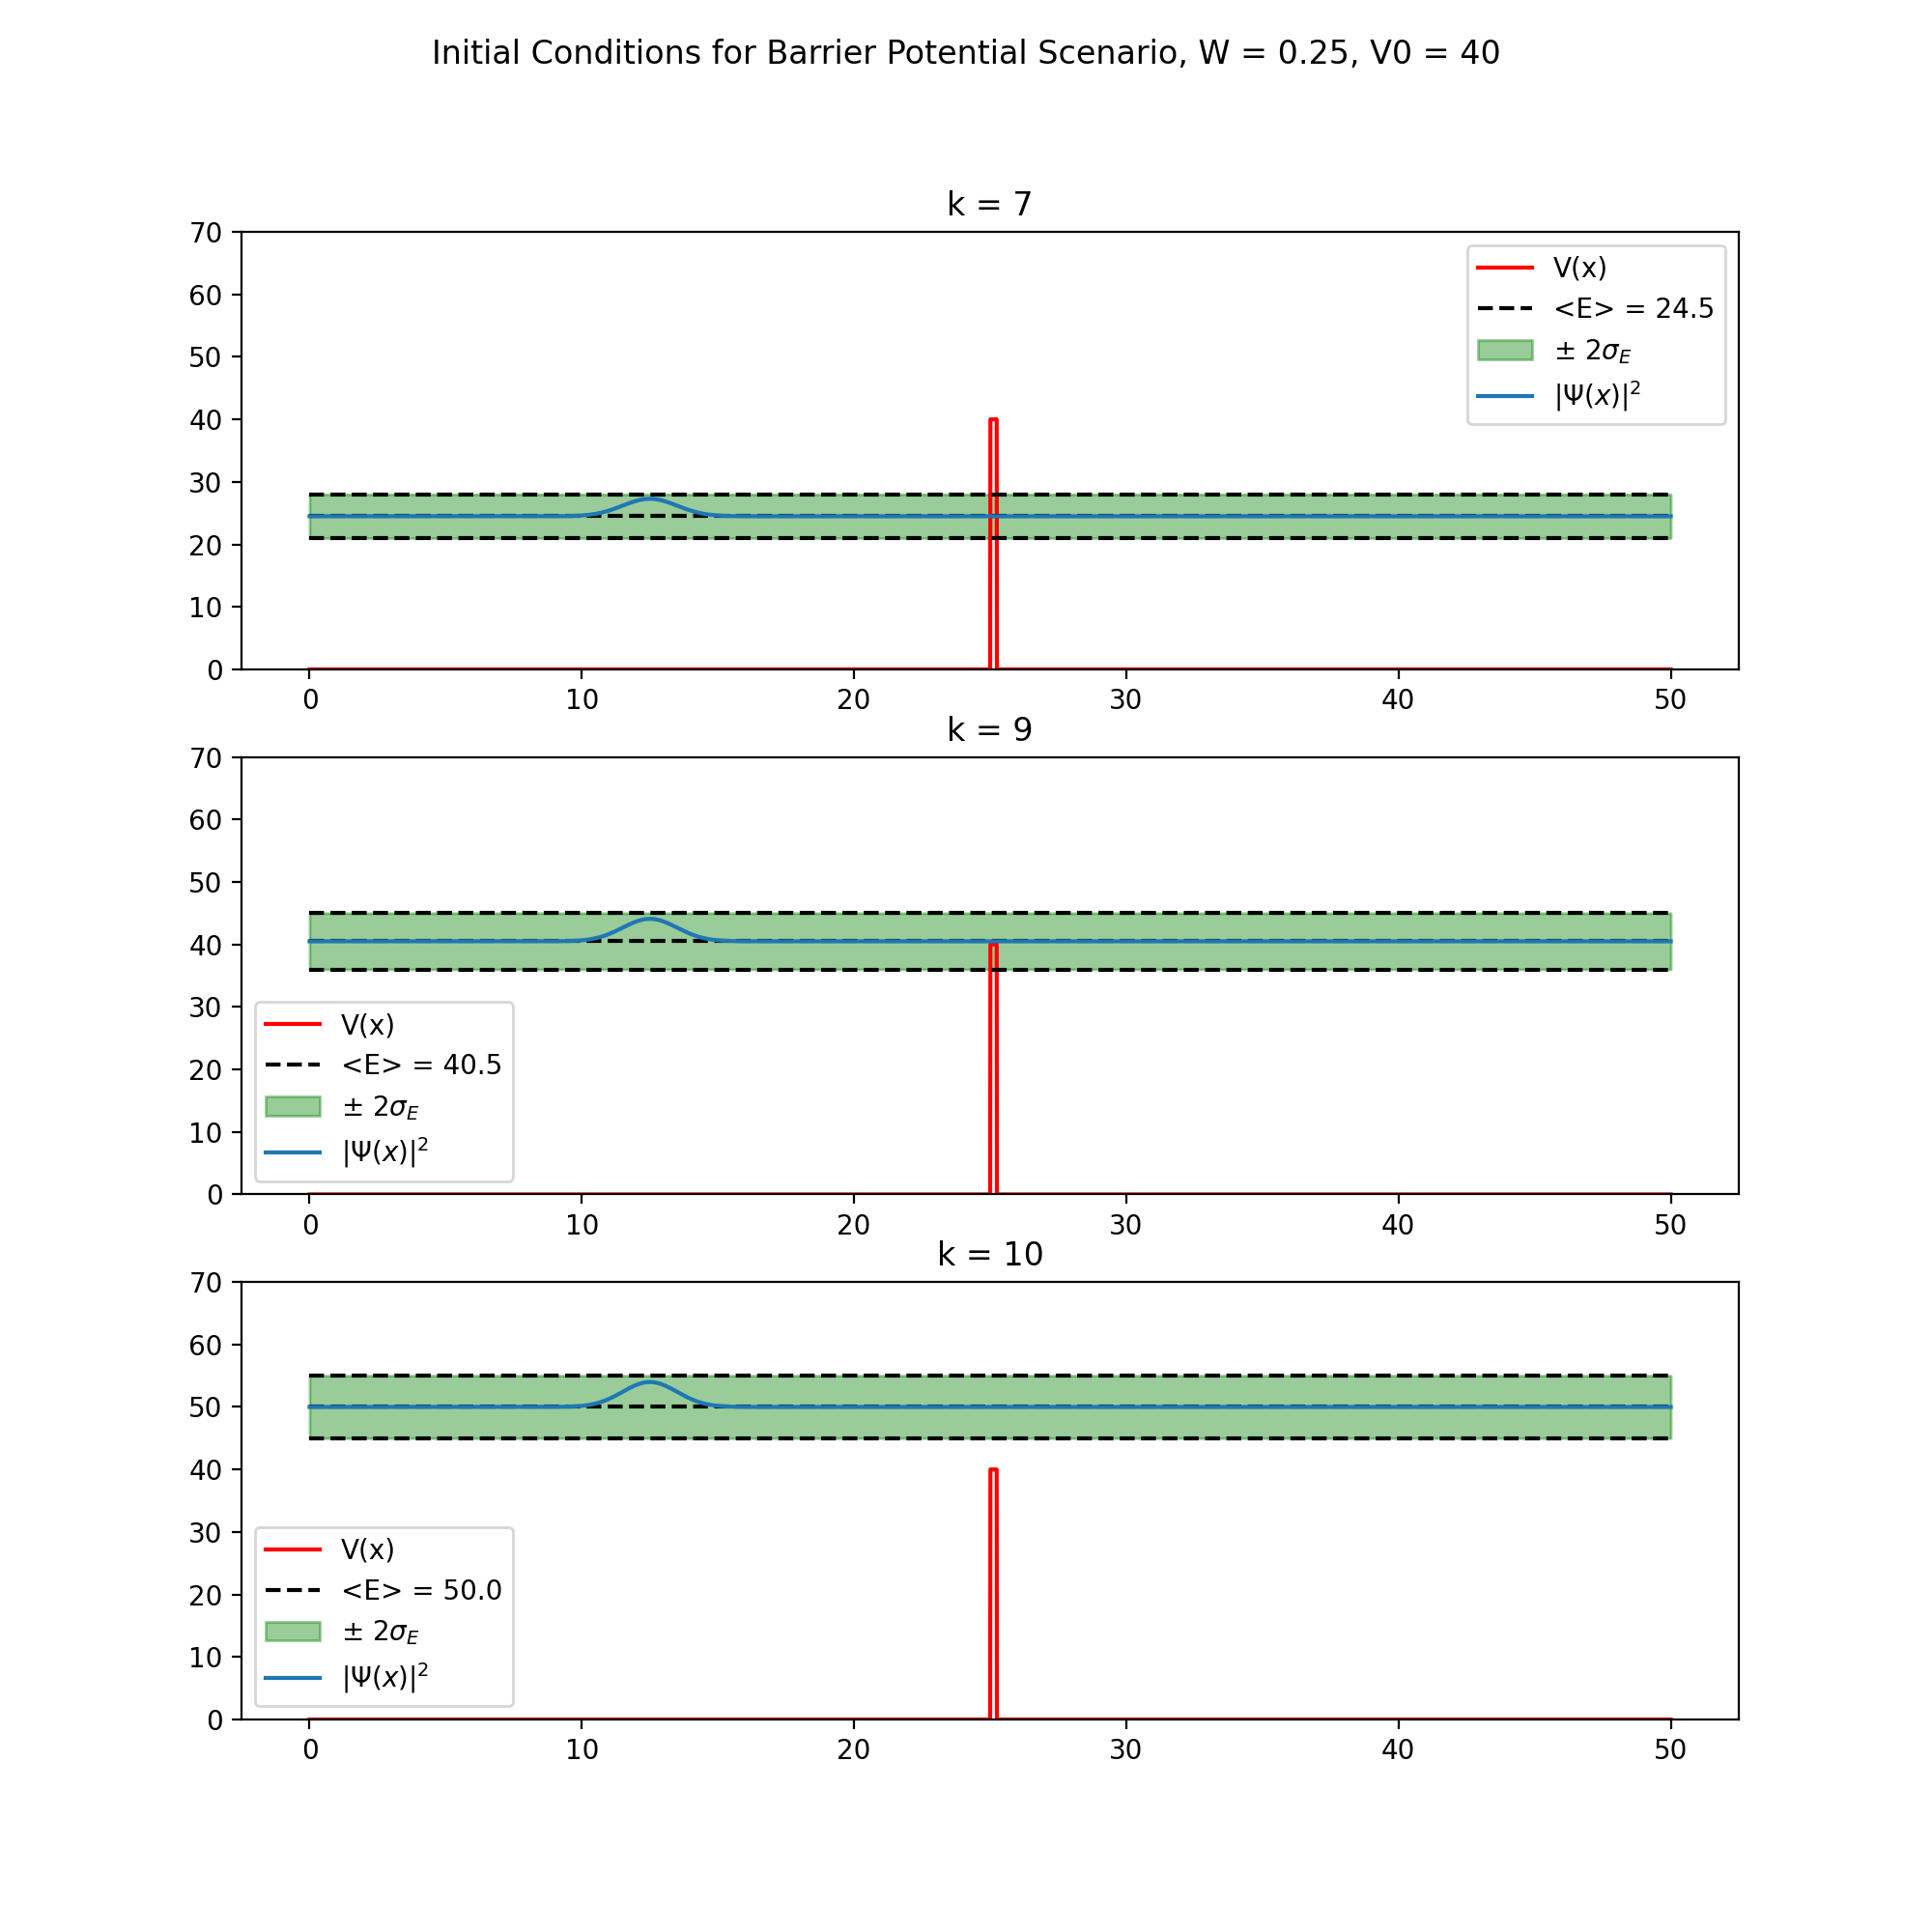

<IPython.core.display.Javascript object>


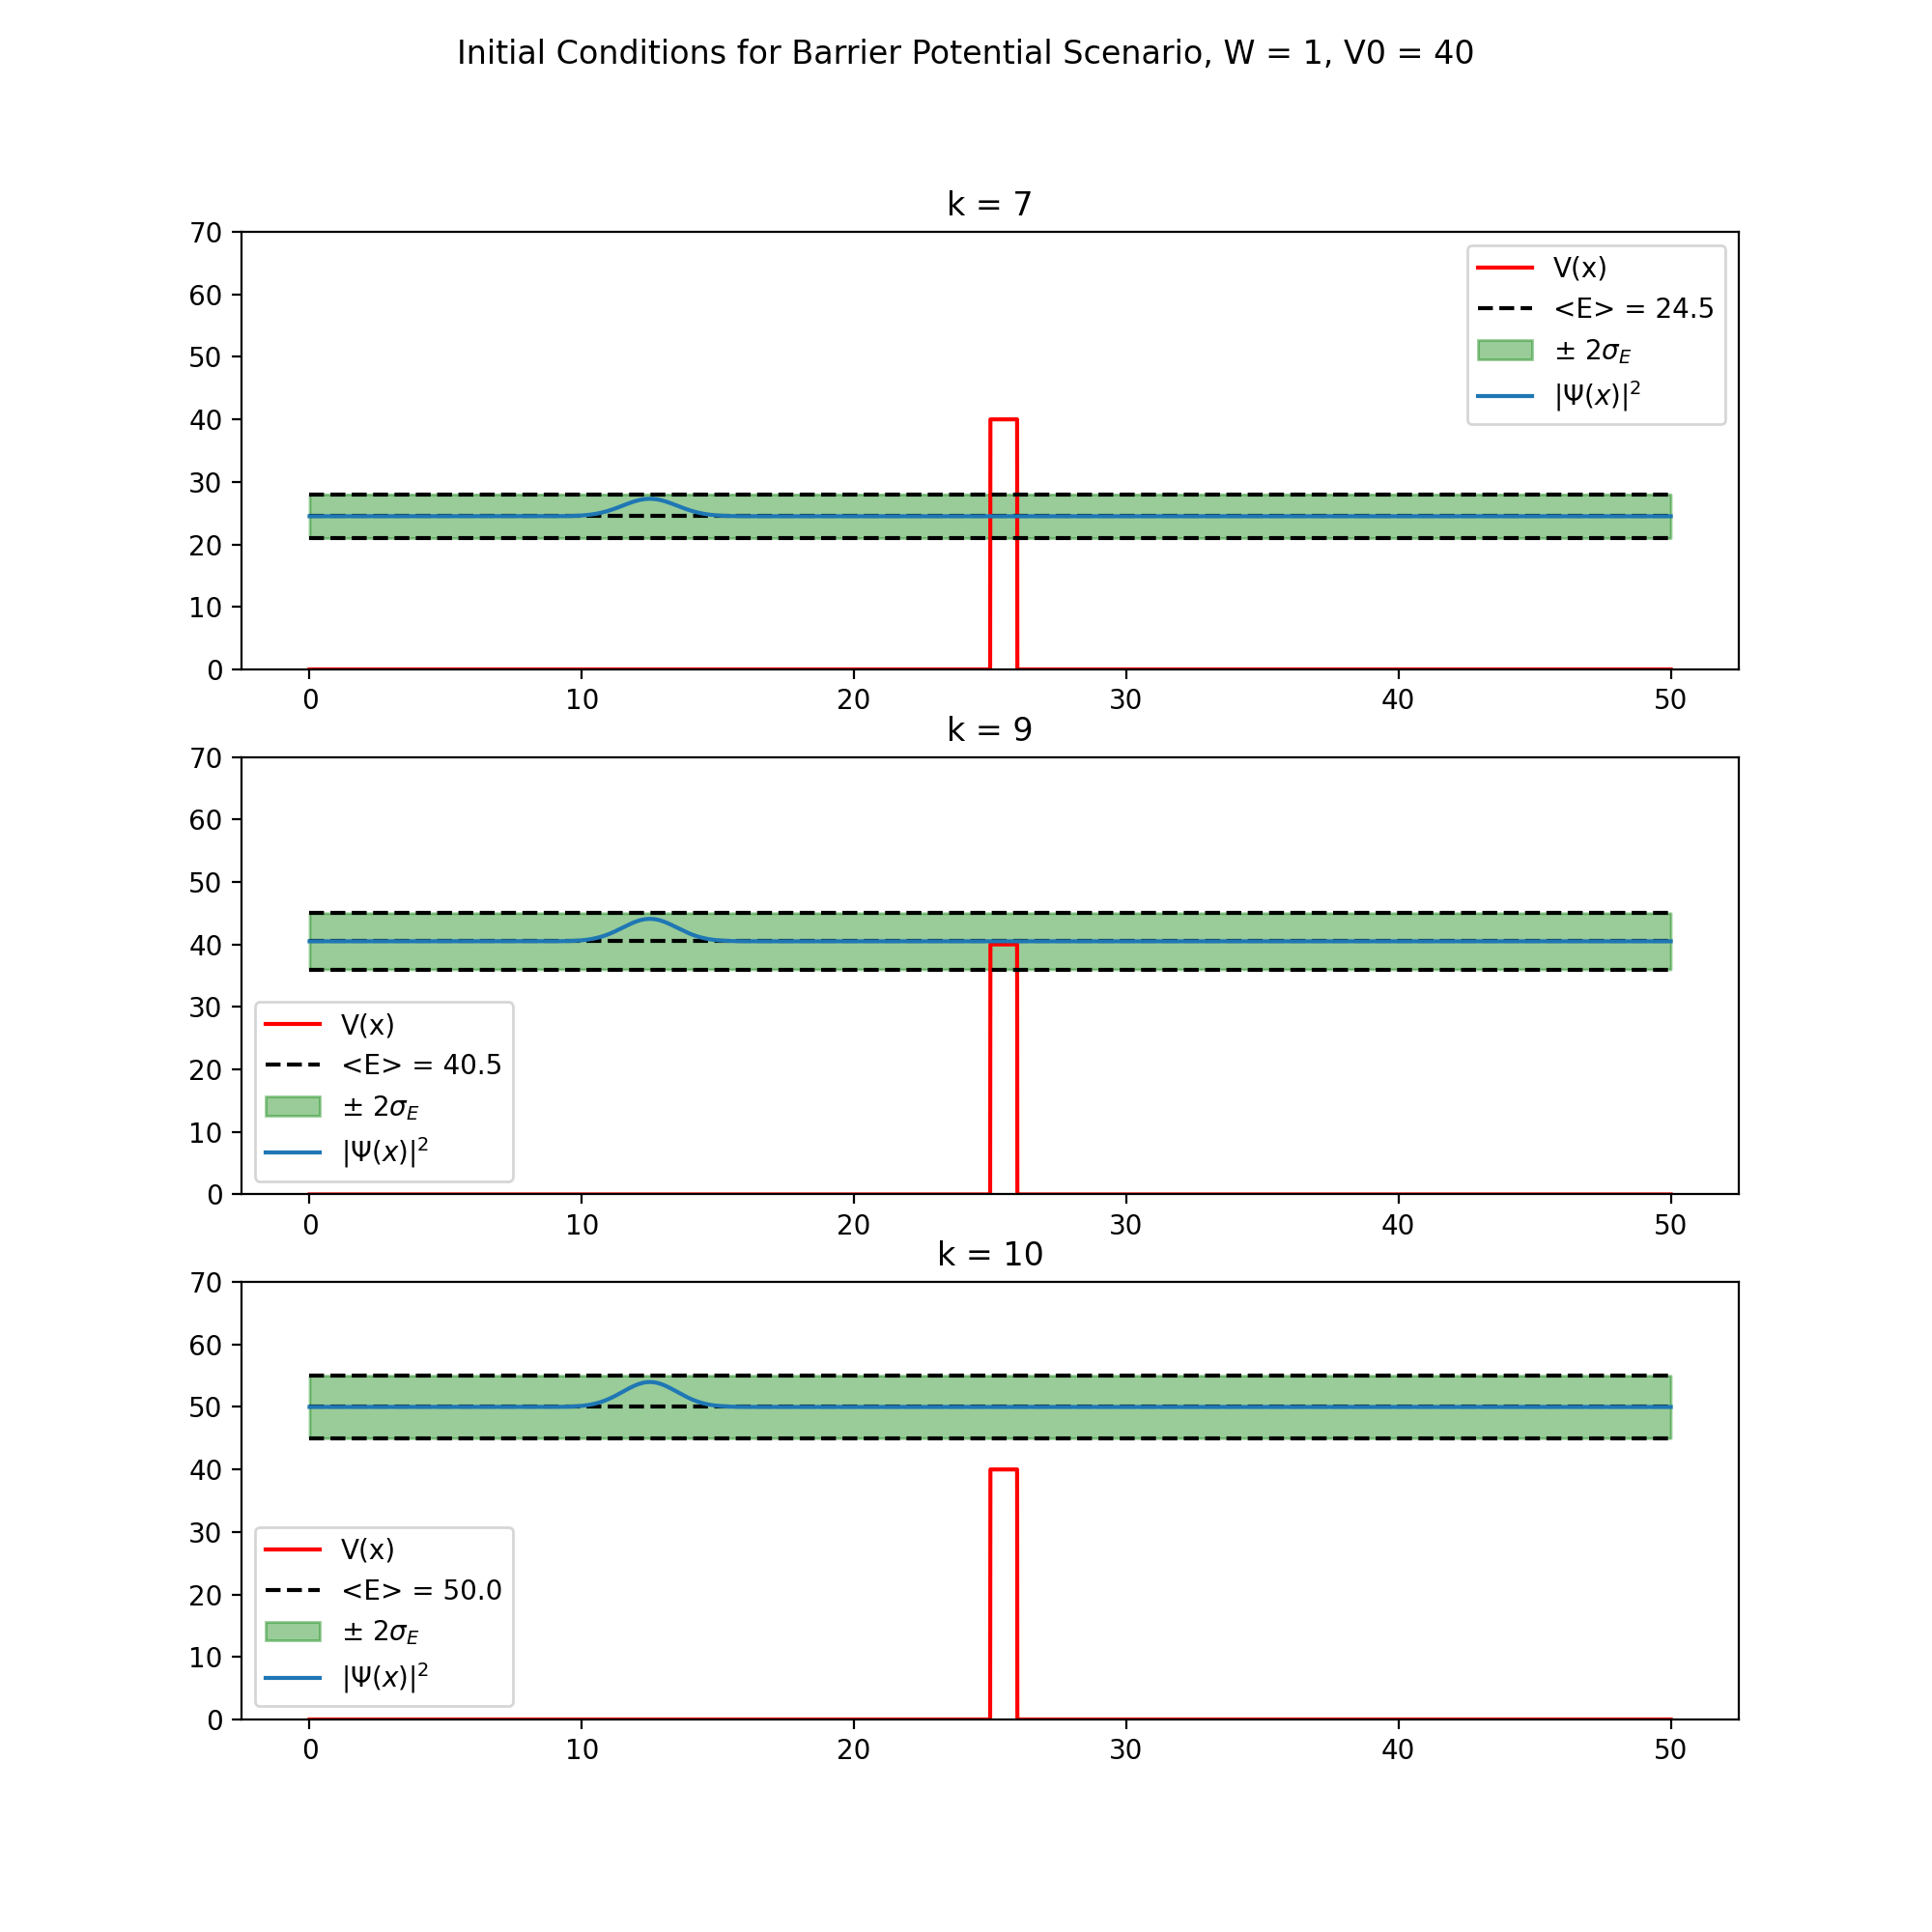

<IPython.core.display.Javascript object>


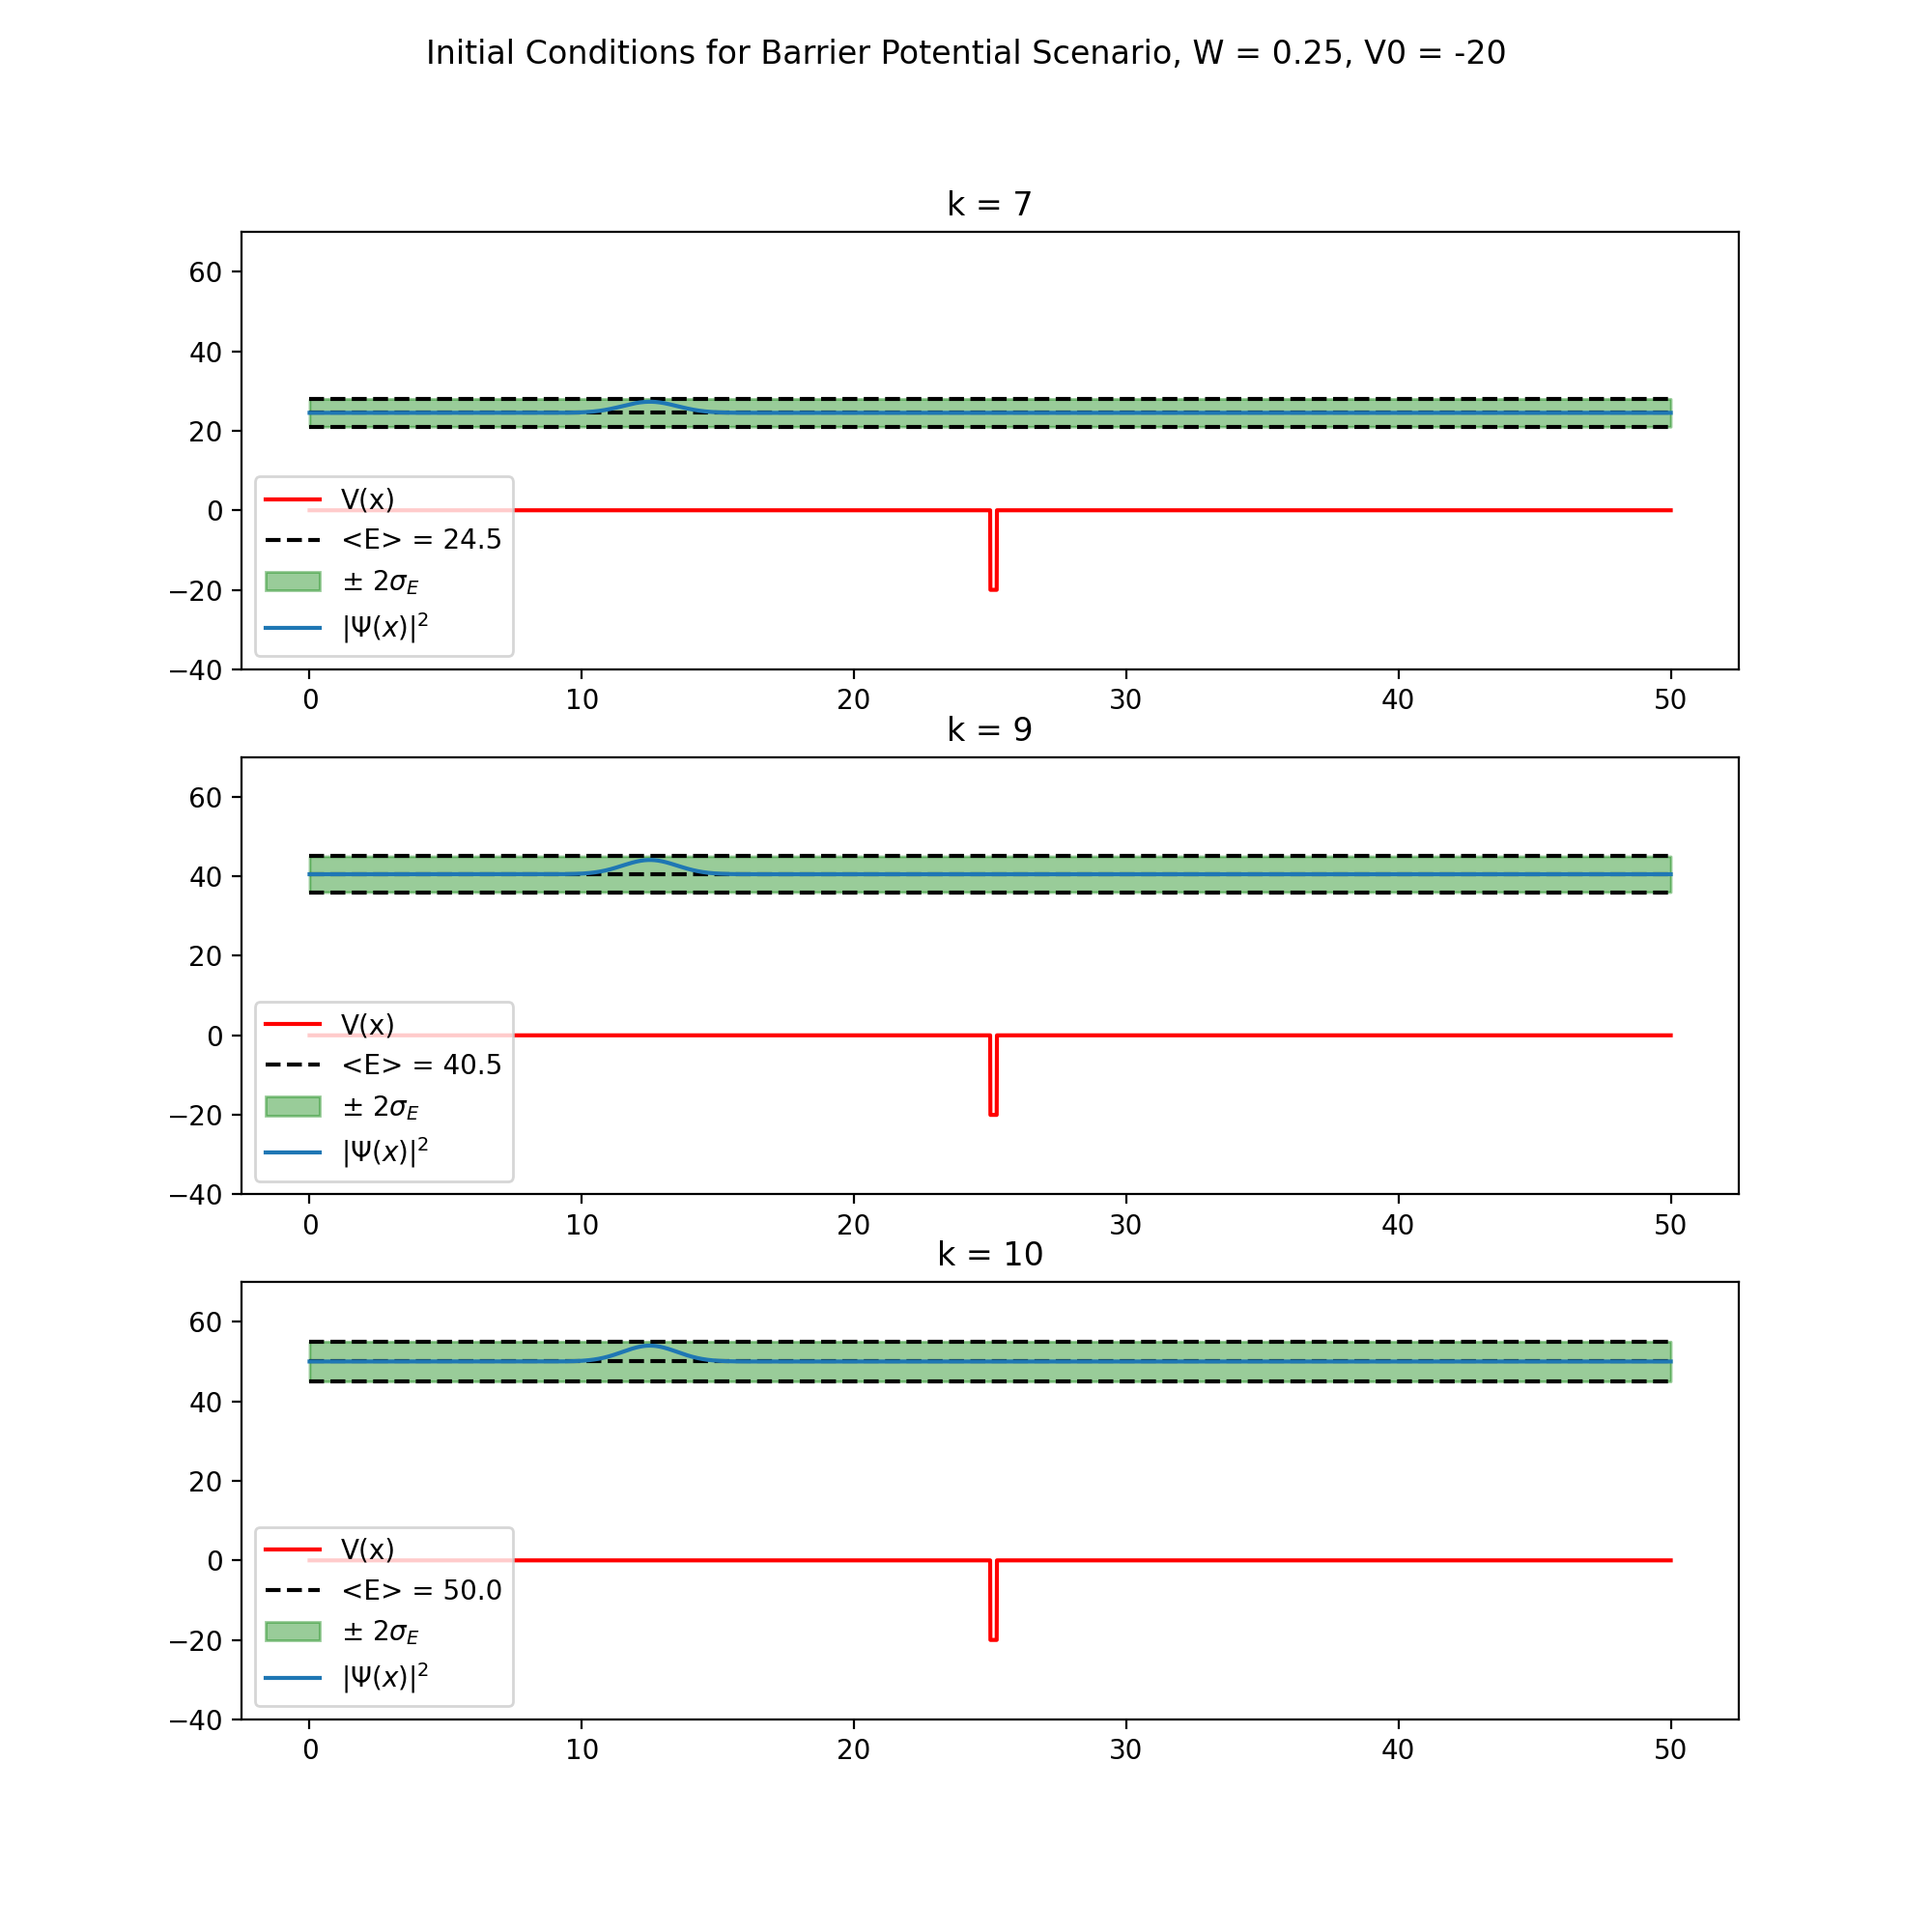

In [23]:
sigx = 1
kvals = [7,9,10]

for i in range(4):
    fig = plt.figure(figsize = (10,10))
    
    if i == 0:
        fig.suptitle('Initial Conditions for Step Potential Scenario, Vstep = 40')
        for j in range(3):
            Emean = hbar**2 *kvals[j]**2/(2*m)
            sigmaE = hbar**2 * kvals[j]/(2*m*sigx)
            label = '<E> = ' + str(Emean)
            V = step_potential(x,40)
            psi = wavepacket(x,sigx,x0,kvals[j])
            scale = 2*sigmaE
            Elow = (Emean - sigmaE)*np.ones(x.size)
            Eup = (Emean + sigmaE)*np.ones(x.size)
            
            ax = plt.subplot(3,1,j+1)
            ax.plot(x,V, color = 'red',label = 'V(x)')
            ax.plot([x.min(),x.max()],[Emean,Emean],color = 'black',linestyle='--',label = label)
            ax.plot([x.min(),x.max()],[Emean + sigmaE,Emean + sigmaE],color = 'black',linestyle='--')
            ax.plot([x.min(),x.max()],[Emean - sigmaE,Emean - sigmaE],color = 'black',linestyle='--')
            ax.fill_between(x,y1 = Eup, y2 = Elow, color='green', alpha=.4, label = '$\pm$ 2$\sigma_{E}$')
            ax.plot(x,Emean + scale*np.abs(psi)**2,label = '$|\Psi(x)|^{2}$')
            ax.set_title('k = ' + str(kvals[j]))
            ax.set_ylim(0,70)
            
            ax.legend()
    elif i == 1:
        fig.suptitle('Initial Conditions for Barrier Potential Scenario, W = 0.25, V0 = 40')
        for j in range(3):
            Emean = hbar**2 *kvals[j]**2/(2*m)
            sigmaE = hbar**2 * kvals[j]/(2*m*sigx)
            label = '<E> = ' + str(Emean)
            V = barrier_potential(x,40,0.25)
            psi = wavepacket(x,sigx,x0,kvals[j])
            scale = 2*sigmaE
            Elow = (Emean - sigmaE)*np.ones(x.size)
            Eup = (Emean + sigmaE)*np.ones(x.size)
            
            ax = plt.subplot(3,1,j+1)
            ax.plot(x,V, color = 'red',label = 'V(x)')
            ax.plot([x.min(),x.max()],[Emean,Emean],color = 'black',linestyle='--',label = label)
            ax.plot([x.min(),x.max()],[Emean + sigmaE,Emean + sigmaE],color = 'black',linestyle='--')
            ax.plot([x.min(),x.max()],[Emean - sigmaE,Emean - sigmaE],color = 'black',linestyle='--')
            ax.fill_between(x,y1 = Eup, y2 = Elow, color='green', alpha=.4, label = '$\pm$ 2$\sigma_{E}$')
            ax.plot(x,Emean + scale*np.abs(psi)**2,label = '$|\Psi(x)|^{2}$')
            ax.set_title('k = ' + str(kvals[j]))
            ax.set_ylim(0,70)
            
            ax.legend()
    elif i == 2:
        fig.suptitle('Initial Conditions for Barrier Potential Scenario, W = 1, V0 = 40')
        for j in range(3):
            Emean = hbar**2 *kvals[j]**2/(2*m)
            sigmaE = hbar**2 * kvals[j]/(2*m*sigx)
            label = '<E> = ' + str(Emean)
            V = barrier_potential(x,40,1)
            psi = wavepacket(x,sigx,x0,kvals[j])
            scale = 2*sigmaE
            Elow = (Emean - sigmaE)*np.ones(x.size)
            Eup = (Emean + sigmaE)*np.ones(x.size)
            
            ax = plt.subplot(3,1,j+1)
            ax.plot(x,V, color = 'red',label = 'V(x)')
            ax.plot([x.min(),x.max()],[Emean,Emean],color = 'black',linestyle='--',label = label)
            ax.plot([x.min(),x.max()],[Emean + sigmaE,Emean + sigmaE],color = 'black',linestyle='--')
            ax.plot([x.min(),x.max()],[Emean - sigmaE,Emean - sigmaE],color = 'black',linestyle='--')
            ax.fill_between(x,y1 = Eup, y2 = Elow, color='green', alpha=.4, label = '$\pm$ 2$\sigma_{E}$')
            ax.plot(x,Emean + scale*np.abs(psi)**2,label = '$|\Psi(x)|^{2}$')
            ax.set_title('k = ' + str(kvals[j]))
            ax.set_ylim(0,70)
            
            ax.legend()
    else:
        fig.suptitle('Initial Conditions for Barrier Potential Scenario, W = 0.25, V0 = -20')
        for j in range(3):
            Emean = hbar**2 *kvals[j]**2/(2*m)
            sigmaE = hbar**2 * kvals[j]/(2*m*sigx)
            label = '<E> = ' + str(Emean)
            V = barrier_potential(x,-20,0.25)
            psi = wavepacket(x,sigx,x0,kvals[j])
            scale = 2*sigmaE
            Elow = (Emean - sigmaE)*np.ones(x.size)
            Eup = (Emean + sigmaE)*np.ones(x.size)
            
            ax = plt.subplot(3,1,j+1)
            ax.plot(x,V, color = 'red',label = 'V(x)')
            ax.plot([x.min(),x.max()],[Emean,Emean],color = 'black',linestyle='--',label = label)
            ax.plot([x.min(),x.max()],[Emean + sigmaE,Emean + sigmaE],color = 'black',linestyle='--')
            ax.plot([x.min(),x.max()],[Emean - sigmaE,Emean - sigmaE],color = 'black',linestyle='--')
            ax.fill_between(x,y1 = Eup, y2 = Elow, color='green', alpha=.4, label = '$\pm$ 2$\sigma_{E}$')
            ax.plot(x,Emean + scale*np.abs(psi)**2,label = '$|\Psi(x)|^{2}$')
            ax.set_title('k = ' + str(kvals[j]))
            ax.set_ylim(-40,70)
            
            ax.legend()

__________________________________________________________________________________________
Part 3 (9 points)

- write the code to solve the TDSE to get the wave-function vs t given any of the conditions above. 
- make an animation of the wave-function based on the solution
- try it on one or more of the cases above




Start
Done
% Total reflection:0.003088523602578345
% Total transmission:0.9969114763974216


<IPython.core.display.Javascript object>


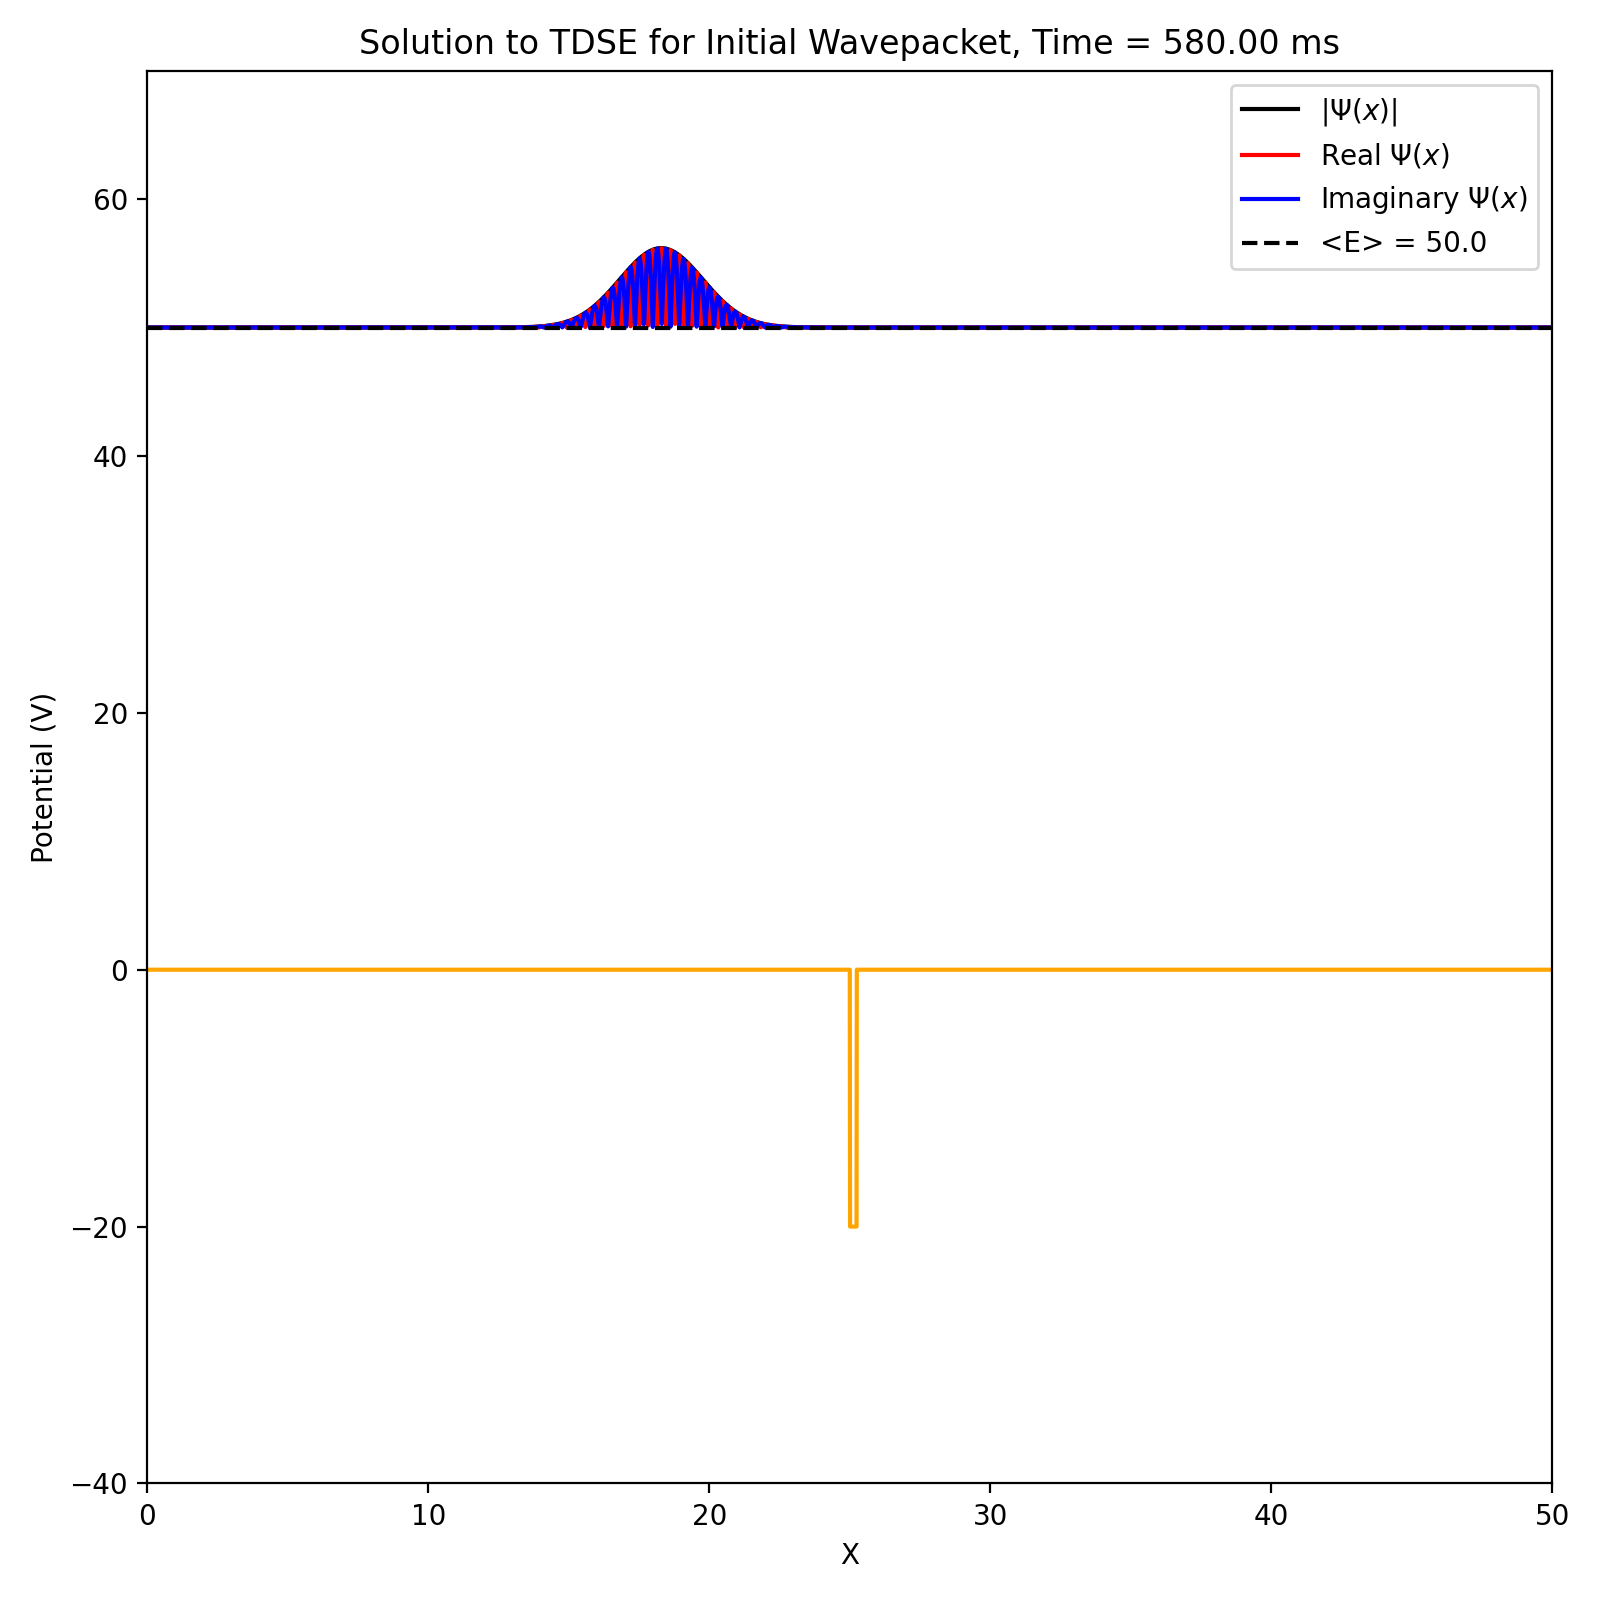

In [24]:
Lap = sparse.diags([1,-2,1],[-1,0,1], shape = [x.size,x.size]) / dx**2

def timedependent(t,psi,V):

    return -1j * (-0.5 * hbar / m * Lap.dot(psi) + V / hbar * psi)

t_min = 0
t_max = 4
dt = 0.005
t = np.arange(t_min,t_max+dt,dt)
V = barrier_potential(x,-20,0.25)

k = 10
Emean = hbar**2 * k**2/(2*m)
sigmaE = hbar**2 * k/(2*m*sigx)
psi0 = wavepacket(x,1,12.5,k)

print('Start')
solution = solve_ivp(timedependent,t_span=[t_min,t_max], y0 = psi0, t_eval=t,method='RK23',args=(V,))
print('Done')

integ = np.empty(t.size)
left_integ = np.copy(integ)
right_integ = np.copy(integ)

halfway = np.int_(x.size/2)

for j in range(t.size):
    integ[j] = np.sum(np.abs(solution.y[:,j])**2)*dx
    left_integ[j] = np.sum(np.abs(solution.y[:halfway:,j])**2)*dx
    right_integ[j] = np.sum(np.abs(solution.y[halfway::,j])**2)*dx
    
print('% Total reflection:' + str(left_integ[len(t)-1]/integ[len(t)-1]))
print('% Total transmission:' + str(right_integ[len(t)-1]/integ[len(t)-1]))

fig = plt.figure(figsize=(8,8))
ax1 = plt.axes(xlim = (0,x_max), ylim = (-40,70))
scale = 2*sigmaE
ax1.set_xlim(0,x.max())
ax1.plot(x,V,color = 'orange')
ax1.set_xlabel('X')
ax1.set_ylabel('Potential (V)')

line1, = ax1.plot([],[], 'black', label = '$|\Psi(x)|$')
line2, = ax1.plot([],[], 'red', label = 'Real $\Psi(x)$')
line3, = ax1.plot([],[], 'blue', label = 'Imaginary $\Psi(x)$')
title = ax1.set_title(' ')
                  
Elabel = '<E> = ' + str(Emean)
ax1.plot([x.min(),x.max()],[Emean,Emean], 'black', linestyle = '--', label = Elabel)
ax1.legend()

def init():
    line1.set_data([],[])
    line2.set_data([],[])
    line3.set_data([],[])
                  
    return line1,line2,line3,
    
def animate(i):
    line1.set_data(x,Emean + scale*np.abs(solution.y[:,i]))
    line2.set_data(x,Emean + scale*np.abs(solution.y[:,i].real))
    line3.set_data(x,Emean + scale*np.abs(solution.y[:,i].imag))
    title.set_text('Solution to TDSE for Initial Wavepacket, Time = {:.2f} ms'.format(1000*solution.t[i]))
    
    return line1,line2,line3
    
anim = animation.FuncAnimation(fig,animate,init_func=init,frames=len(solution.t),interval = 5,blit = True)
plt.tight_layout()
plt.show()

Part 4a (1 point)

- for case 2a) above run your script for the 3 $k_0$ and see what is happening
- calcuate the 'transmission' and 'reflection' for each


_______________________________________________________________________
Observations

-For the 2a.) case with a step-potential with potential step V = 40, passing a wave packet with initial wavenumber k = 7 results in about 99.998% reflection off of the potential wall. The mean energy level lies below the maximum potential point (but above the 0 level), and the resulting wave hits the potential wall and reflects entirely, with only about 0.002% transmission across the potential barrier (effectively 0).

-For the case of initial wavenumber k = 9, the mean energy of the packet lies slightly above the potential step. The resulting effect is the wavepacket travelling, and somewhat reflecting and transmitting in either direction after reaching the step (i.e. the packet still faces some interference). There is about 65% reflection and 35% transmission, indicating that the potential step had less of an interference on the wavepacket transmission.

-For the case of initial wavenumber k = 10, the mean energy of the packet lies decently above the potential step. The wavepacket experiences much less interference from the step potential compared to the previous cases, and most of the wave is able to transmit as opposed to reflecting. There is about 19% reflection and 81% transmission.

________________________________________________________________________

Part 4b (1 point)

- for case 2b) above run your script for the 3 $k_0$ and see what is happening
- calcuate the 'transmission' and 'reflection' for each



_______________________________________________________________________
Observations

-For the 2b.) case with a barrier potential with maximum height V = 40 and width 0.25, passing a wave packet with intial wavenumber k = 7 results in about 76% reflection and 24% transmission. The barrier potential here is effectively the same as the step potential, only with finite width. The decreased width of that potential barrier in this case results in more of the wave being able to transmit compared to the k = 7 case in 2a.)

-For the case of initial wavenumber k = 9, the wavepacket travels along and experiences interference again at the jump in potential, after which it almost splits in half into a left and right travelling wave. However, compared to the 2a.) case where that potential step has infinite width, the finite width case results in more of the wave being transmitted. There was about 53% reflection and 47% transmission.

-For the case of initial wavenumber k = 10, the resulting interference from the potential causes about 38% reflection and 62% transmission. In the previous cases, compared to 2a.), we saw that the smaller width in the potential step led to more of the wave transmitting past the barrier. However, in this case when comparing the k = 10 cases, the wave transmits less here than in the 2a.) case with the step potential.
______________________

Part 4c (1 point)

- for case 2c) above run your script for the 3 $k_0$ and see what is happening
- calcuate the 'transmission' and 'reflection' for each




_______________________________________________________________________
Observations

-For the 2c.) case with a barrier potential with maximum height V = 40 and width 1, passing a wave packet with intial wavenumber k = 7 results in about 99.98% reflection and 0.02% transmission. The barrier potential here is similar to the 2b.) case, but the max potential has a wider width. The increased width in the barrier case results in less of the wave being able to transmit compared to the k = 7 case in 2b.) We actually get similar transmission/reflection results when comparing to the 2a.) case, however the finite width still results in slightly larger transmission.

-For the case of initial wavenumber k = 9, the wavepacket travels along and experiences interference again at the jump in potential, after which it almost splits into a left and right travelling wave, however with much more reflection than the 2b.) case. However, compared to the 2a.) case where that potential step has infinite width, the finite width case results in more of the wave being transmitted. The reflected/transmitted waves also take on slightly obscure shapes compared to the original wavepacket shape. There was about 73% reflection and 27% transmission.

-For the case of initial wavenumber k = 10, there was about 31% reflection and 69% transmission. Compared to the previous 2b.) case, the increased width in the barrier leads to more transmission of the wave past the barrier. The overall transmission is still less than the "infinite" width case in 2a.)
________________________________________________________________________

Part 4d (1 point)

- for case 2d) above run your script for the 3 $k_0$ and see what is happening
- calcuate the 'transmission' and 'reflection' for each


________________________________________________
Observations

-For the 2d.) case with a barrier potential of step V = -20 and width 0.25, passing a wavepacket with initial wavenumber k = 7 results in nearly no interference in transmission of the wave. There is about 5% reflection and 95% transmission. The mean energy of the wavepacket lies significantly above the "well" of the potential barrier, and thus the potential "drop" here has very small interference on the wavepacket compared to the previous cases.

-For the case of initial wavenumber k = 9, the mean energy of the wavepacket increases and thus lies much further above the potential barrier well. As a result, less of the wavepacket is reflected due to interference from the potential, and there is about 1% reflection and 99% transmission.

-For the case of initial wavenumber k = 10, continuing along the same trend of decreasing reflection for increasing mean energy in this potential well case scenario, there is about 0.3% reflection and 99.7% transmission.
______________________________________________